In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('Exclusive_Economic_Zones_Ranking2.csv', delimiter=',')
# remove \xa0 from Country 
df['Country'] = df['Country'].str.replace('\xa0', '')
# Some values have commas in numbers, we need to remove these and convert columns to numeric
df['EEZ'] = df['EEZ'].replace(',', '', regex=True).astype(int)
df['Land'] = df['Land'].replace(',', '', regex=True).astype(int)

LMIN=0.4*10**2
LMAX=10**7
EMIN=0.9*10**5
EMAX=.8*10**7

# calculate a column 'EEZ/Land' which is the ratio of EEZ to Land
df['EEZ/Land'] = df['EEZ'] / df['Land']
# calculate a column with log10 of EEZ/Land
df['logEEZ/Land'] = df['EEZ/Land'].apply(lambda x: round(10 * (x**0.1)))
# print the total number of rows in the data
print(f'Total number of rows: {len(df)}')
# print the raw containing the text Maldives in country column
print(df[df['Country'] == 'Maldives'])
# create a column 'Country2' which is the country name with the EEZ/Land ratio in brackets with no decimals
df['Country2'] = df['Country'] + ' (' + df['EEZ/Land'].apply(lambda x: '{:.0f}'.format(x)) + ')'

# filter data to match the range of the plot
df = df[(df['Land'] > LMIN) & (df['EEZ'] > EMIN) ]
print(f'{len(df)} countries in the plot range')


Total number of rows: 154
     Country     EEZ   Land   EEZ/Land  logEEZ/Land
31  Maldives  923322  34538  26.733511           14
105 countries in the plot range


In [37]:
sids_list = [
    'Kiribati', 'Federated States of Micronesia', 'Papua New Guinea', 'Marshall Islands',
    'Cook Islands', 'Solomon Islands', 'Seychelles', 'Mauritius', 'Fiji', 'Maldives',
    'Cape Verde', 'Tuvalu', 'Vanuatu', 'Tonga', 'Bahamas', 'Palau', 'Niue', 'Nauru',
    'São Tomé and Príncipe', 'Samoa', 'Suriname', 'Haiti', 'Guinea-Bissau',
    'Antigua and Barbuda', 'Comoros', 'Dominican Republic', 'Jamaica', 'Barbados'
]
other_countries_list = [
    'United States', 'France', 'Australia', 'Russia', 'United Kingdom', 'Indonesia',
    'Canada', 'Japan', 'New Zealand', 'Brazil', 'Chile', 'Mexico', 'Denmark', 'Norway',
    'India', 'Portugal', 'Philippines', 'South Africa', 'Madagascar', 'Argentina',
    'Ecuador', 'Spain', 'Peru', 'China', 'Somalia', 'Colombia', 'Iceland', 'Mozambique',
    'Morocco', 'Costa Rica', 'Namibia', 'Yemen', 'Italy', 'Oman', 'Myanmar', 'Sri Lanka',
    'Angola', 'Greece', 'South Korea', 'Venezuela', 'Vietnam', 'Ireland', 'Libya', 'Cuba',
    'Panama', 'Malaysia', 'Equatorial Guinea', 'Thailand', 'Pakistan', 'Egypt', 'Turkey',
    'Liberia', 'Honduras', 'Tanzania', 'Ghana', 'Saudi Arabia', 'Nigeria', 'Sierra Leone',
    'Gabon', "Côte d'Ivoire", 'Iran', 'Mauritania', 'Sweden', 'Senegal', 'Netherlands',
    'Ukraine', 'Uruguay', 'Guyana', 'Algeria', 'Nicaragua', 'Bangladesh', 'Kenya',
    'Guatemala', 'North Korea', 'Tunisia', 'Cyprus', 'El Salvador'
]

# if country is in sids_list, set 'Type' to 'SIDS'
df.loc[df['Country'].isin(sids_list), 'Type'] = 'SIDS'
# if country is in other_countries_list, set 'Type' to 'Other'
df.loc[df['Country'].isin(other_countries_list), 'Type'] = 'Other'

# print if there are any rows with NaN values in Type column
print(df['Type'].isnull().sum())

0


Kiribati (458)
Federated States of Micronesia (154)
Papua New Guinea (13)
Marshall Islands (108)
Cook Islands (1616)
Portugal (62)
Solomon Islands (44)
Seychelles (34)
Mauritius (44)
Fiji (27)
Ecuador (26)
Maldives (27)
Cape Verde (143)
Tuvalu (210)
Vanuatu (58)
Tonga (77)
Bahamas (6)
Palau (213)
Costa Rica (29)
Niue (1115)
Nauru (7524)
Equatorial Guinea (39)
Jamaica (26)
Dominican Republic (24)
Barbados (439)
Comoros (107)
São Tomé and Príncipe (69)
Samoa (61)
Suriname (2)
Haiti (19)
Guinea-Bissau (3)
Antigua and Barbuda (27)


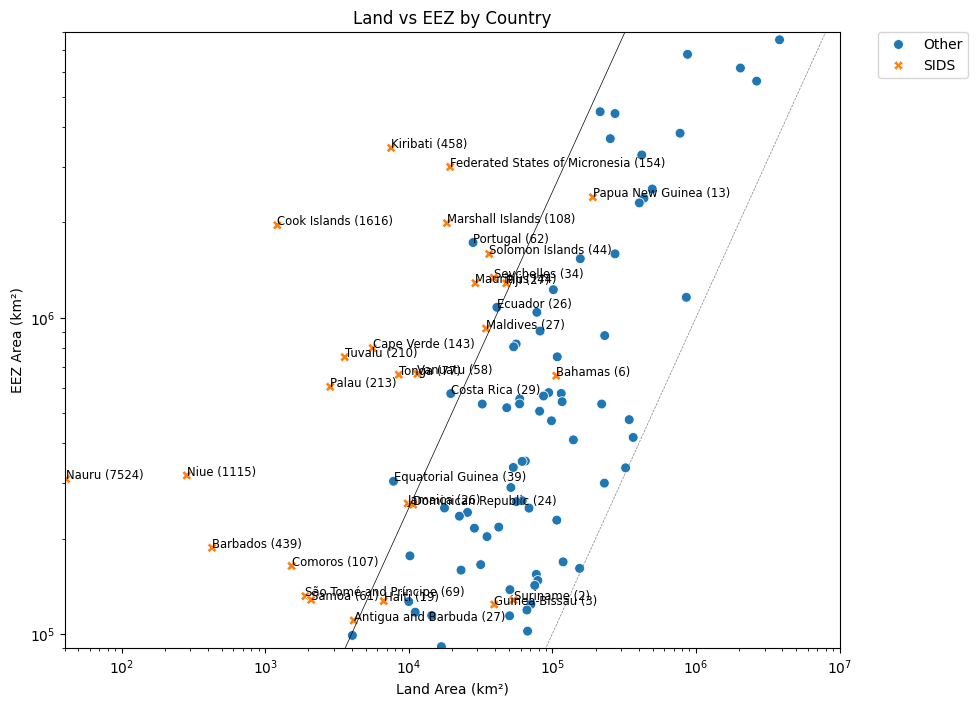

In [47]:
# Plotting using seaborn
plt.figure(figsize=(10, 8))
scatter_plot = sns.scatterplot(data=df, x='Land', y='EEZ',   s=50, style='Type', hue='Type',
                               #hue='logEEZ/Land',palette='viridis', 
                               legend=True)
# log log scale
scatter_plot.set(xscale="log", yscale="log")
# draw a 45 degree line covering exactly the plot area
plt.plot([1, 10**8], [1, 10**8], color='grey', linestyle='--', linewidth=0.5)
FACT = 25
# Adding country labels
# draw another  line covering exactly the plot area  with slope 1000/1
plt.plot([1, 10**8], [1*FACT, 10**8*FACT], color='black', linewidth=0.5)
for index, row in df.iterrows():
    if row['EEZ/Land'] > FACT or row['Type'] == 'SIDS':
        scatter_plot.text(row['Land'] + 0.2, row['EEZ'], row['Country2'], 
                          horizontalalignment='left', size='small', color='black')
        print(row['Country2'])
#set x range and y range
plt.xlim(LMIN, LMAX)
plt.ylim(EMIN, EMAX)
plt.title('Land vs EEZ by Country')
plt.xlabel('Land Area (km²)')
plt.ylabel('EEZ Area (km²)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('Figure4.svg', format='svg')
plt.show()

In [31]:
# find row with EEZ==923322
df[df['EEZ'] == 923322]




,Country,EEZ,Land,EEZ/Land,logEEZ/Land,Country2
31,Maldives,923322,34538,26.733511,14,Maldives (27)


In [32]:
df

,Country,EEZ,Land,EEZ/Land,logEEZ/Land,Country2
0,United States,11351000,2193526,5.174773,12,United States (5)
1,France,10186624,725297,14.044762,13,France (14)
2,Australia,9025053,2194008,4.113500,12,Australia (4)
3,Russia,7566673,3817843,1.981924,11,Russia (2)
4,United Kingdom,6805586,872891,7.796605,12,United Kingdom (8)
...,...,...,...,...,...,...
100,North Korea,113888,50337,2.262511,11,North Korea (2)
101,Antigua and Barbuda,110089,4128,26.668847,14,Antigua and Barbuda (27)
102,Tunisia,101857,67126,1.517400,10,Tunisia (2)
103,Cyprus,98707,4042,24.420336,14,Cyprus (24)
